In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
houseData = pd.read_csv('train.csv')
houseData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Problem 1



<AxesSubplot:>

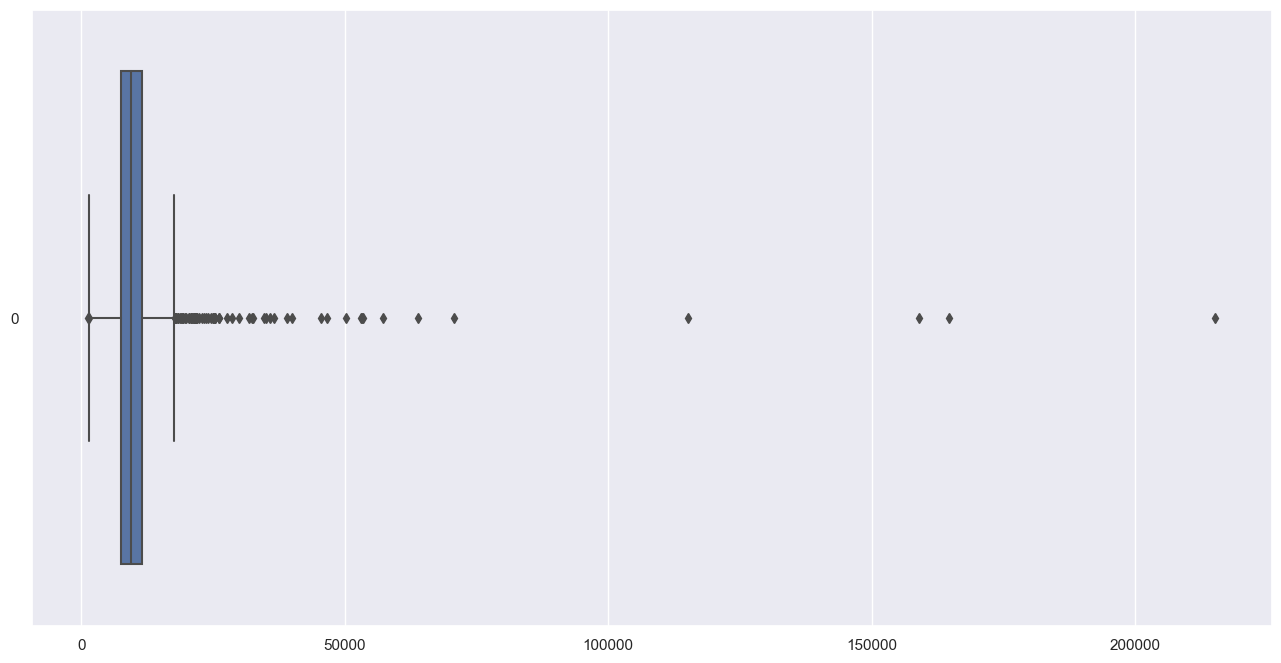

In [93]:
#Problem 1(a)
f = plt.figure(figsize=(16, 8))
sb.boxplot(data = houseData['LotArea'], orient = "h")

<AxesSubplot:xlabel='GrLivArea'>

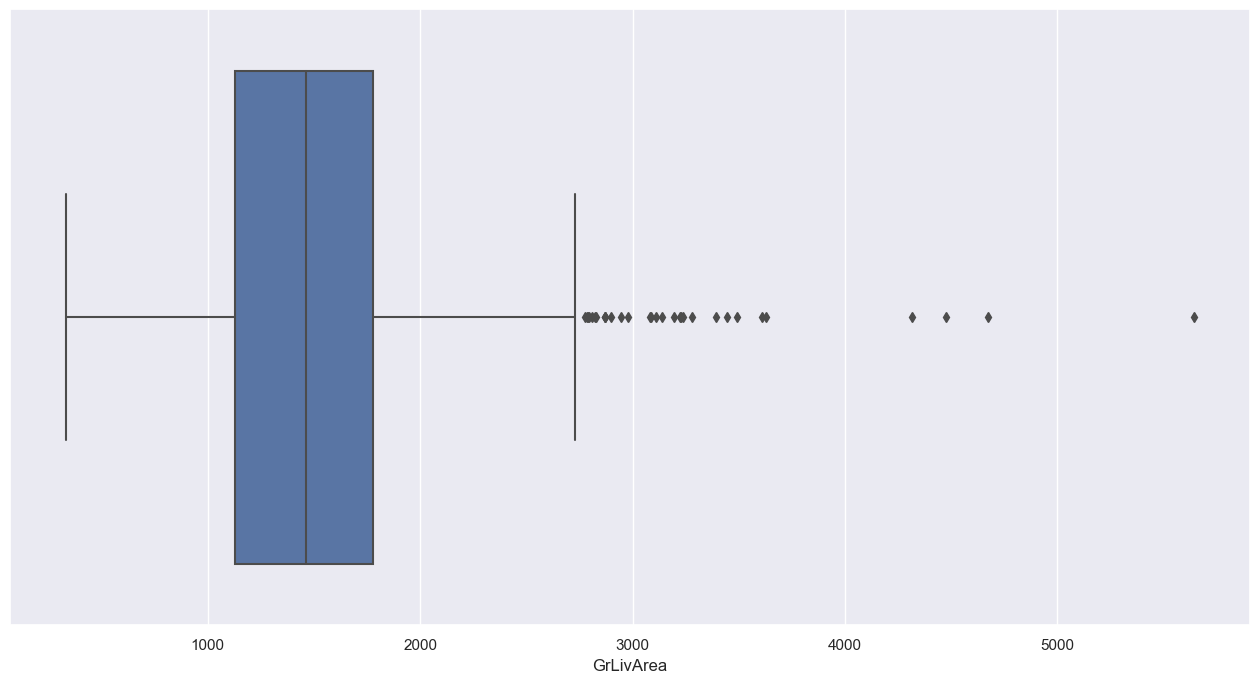

In [50]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(data = houseData, x = "GrLivArea", orient = "h")



<AxesSubplot:xlabel='TotalBsmtSF'>

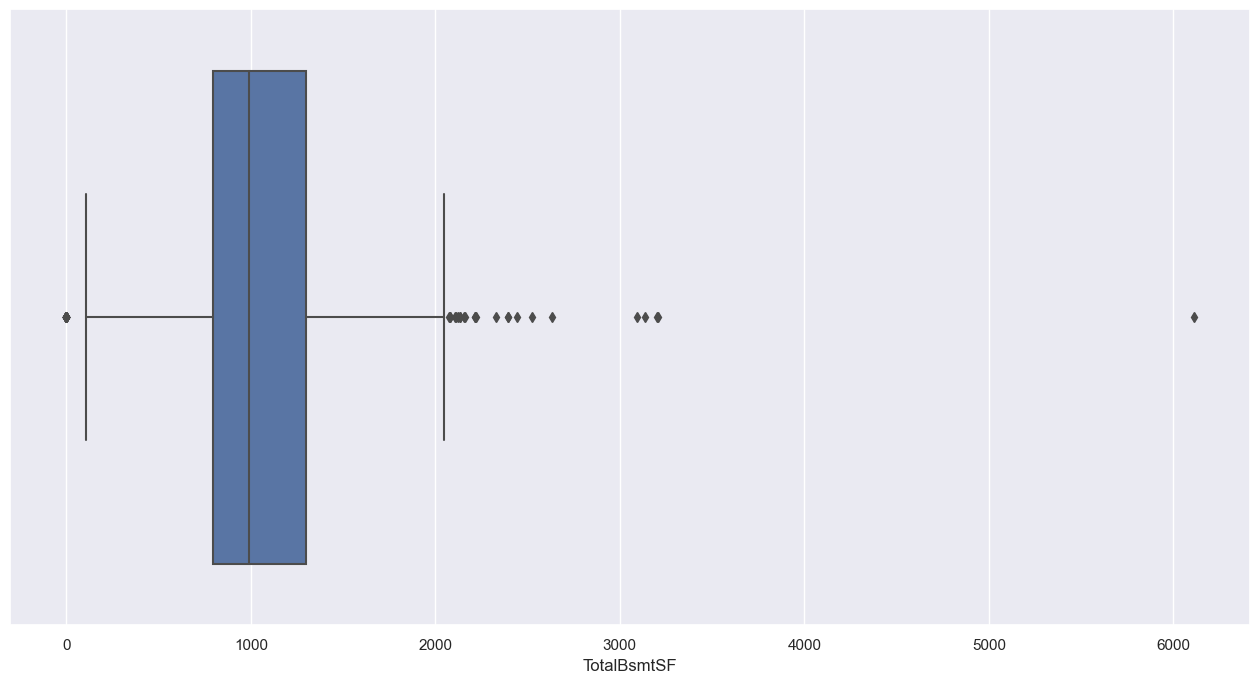

In [53]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(data = houseData, x = "TotalBsmtSF", orient = "h")

<AxesSubplot:xlabel='GarageArea'>

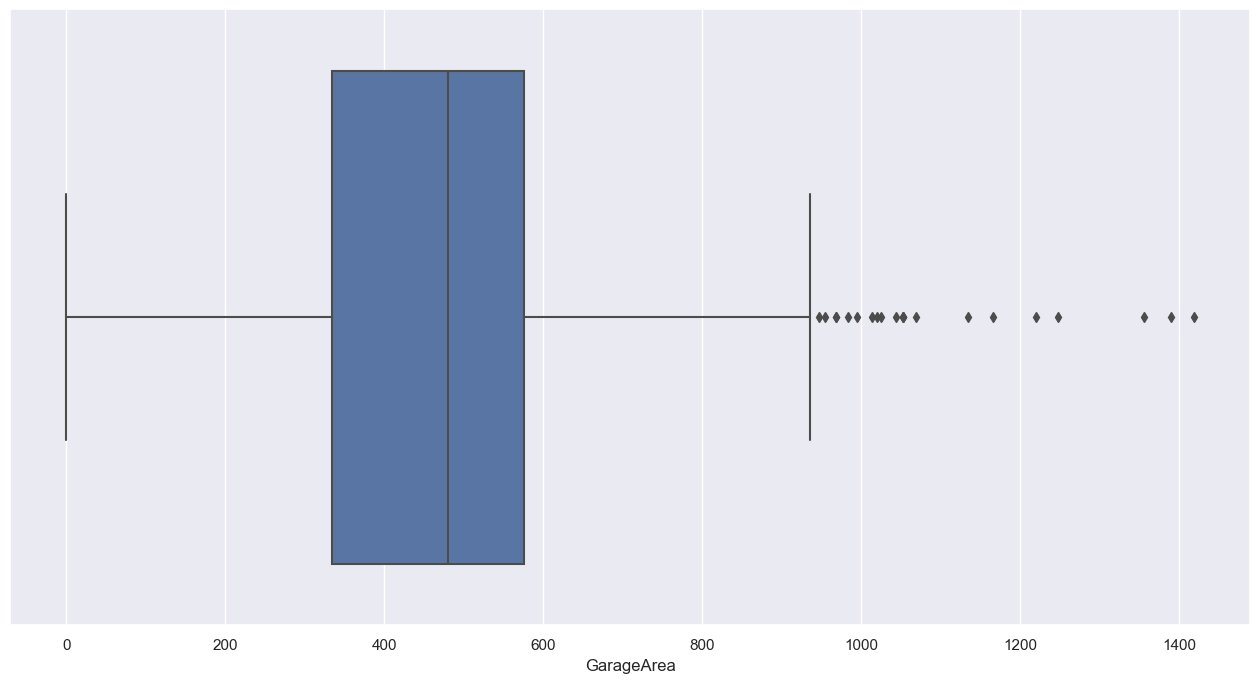

In [52]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(data = houseData, x = "GarageArea", orient = "h")

# 1(a) LotArea has the most number of outliers

In [66]:
houseData['LotArea'].describe().round(2)

#Interquartile range is 4048
#Minimum whisker is 7553.5-1.5*4048 = 1481.5
#Maximum whisker is 11601.5+1.5*4048 = 17673.5 

count      1460.00
mean      10516.83
std        9981.26
min        1300.00
25%        7553.50
50%        9478.50
75%       11601.50
max      215245.00
Name: LotArea, dtype: float64

## 1(a) Accessing the CSV file via excel and sorting "Lot Area" in ascending order
## We find that there are 2 outliers on the left of the whisker and 67 outliers on the right of the whisker, both adding up to 69 outliers

# 1(b)

<AxesSubplot:xlabel='LotArea'>

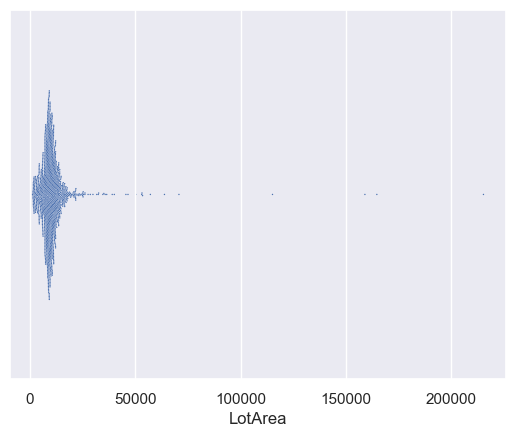

In [103]:
sb.swarmplot(x="LotArea", data=houseData, zorder=.5, size=1)


<AxesSubplot:xlabel='GrLivArea'>

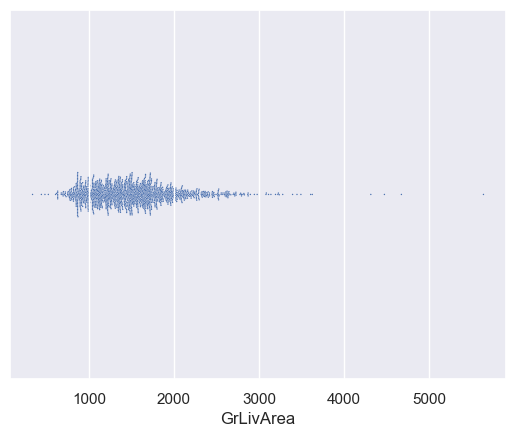

In [101]:
sb.swarmplot(x="GrLivArea", data=houseData, zorder=.5, size=1)

<AxesSubplot:xlabel='TotalBsmtSF'>

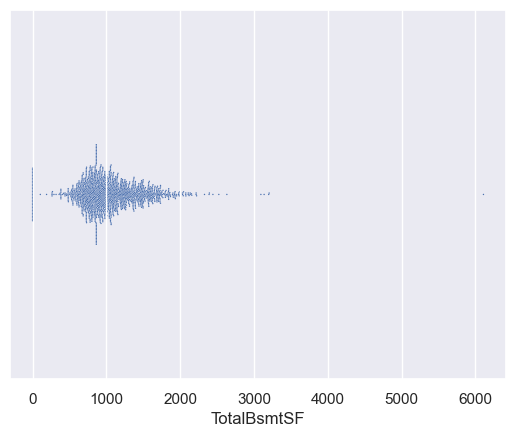

In [104]:
sb.swarmplot(x="TotalBsmtSF", data=houseData, zorder=.5, size=1)

<AxesSubplot:xlabel='GarageArea'>

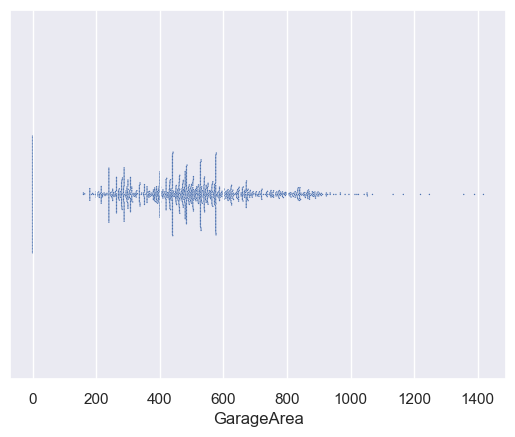

In [106]:
sb.swarmplot(x="GarageArea", data=houseData, zorder=.5, size=1)

## 1(b) TotalBsmtSF is the most skewed from a normal regular distribution. The skew is a positive skew

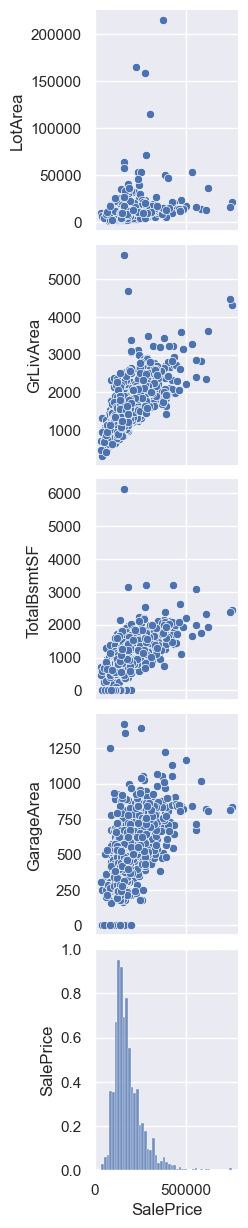

In [123]:
newdata = pd.DataFrame(houseData[["LotArea","GrLivArea","TotalBsmtSF","GarageArea","SalePrice"]])
sb.pairplot(data = newdata, x_vars=['SalePrice'])


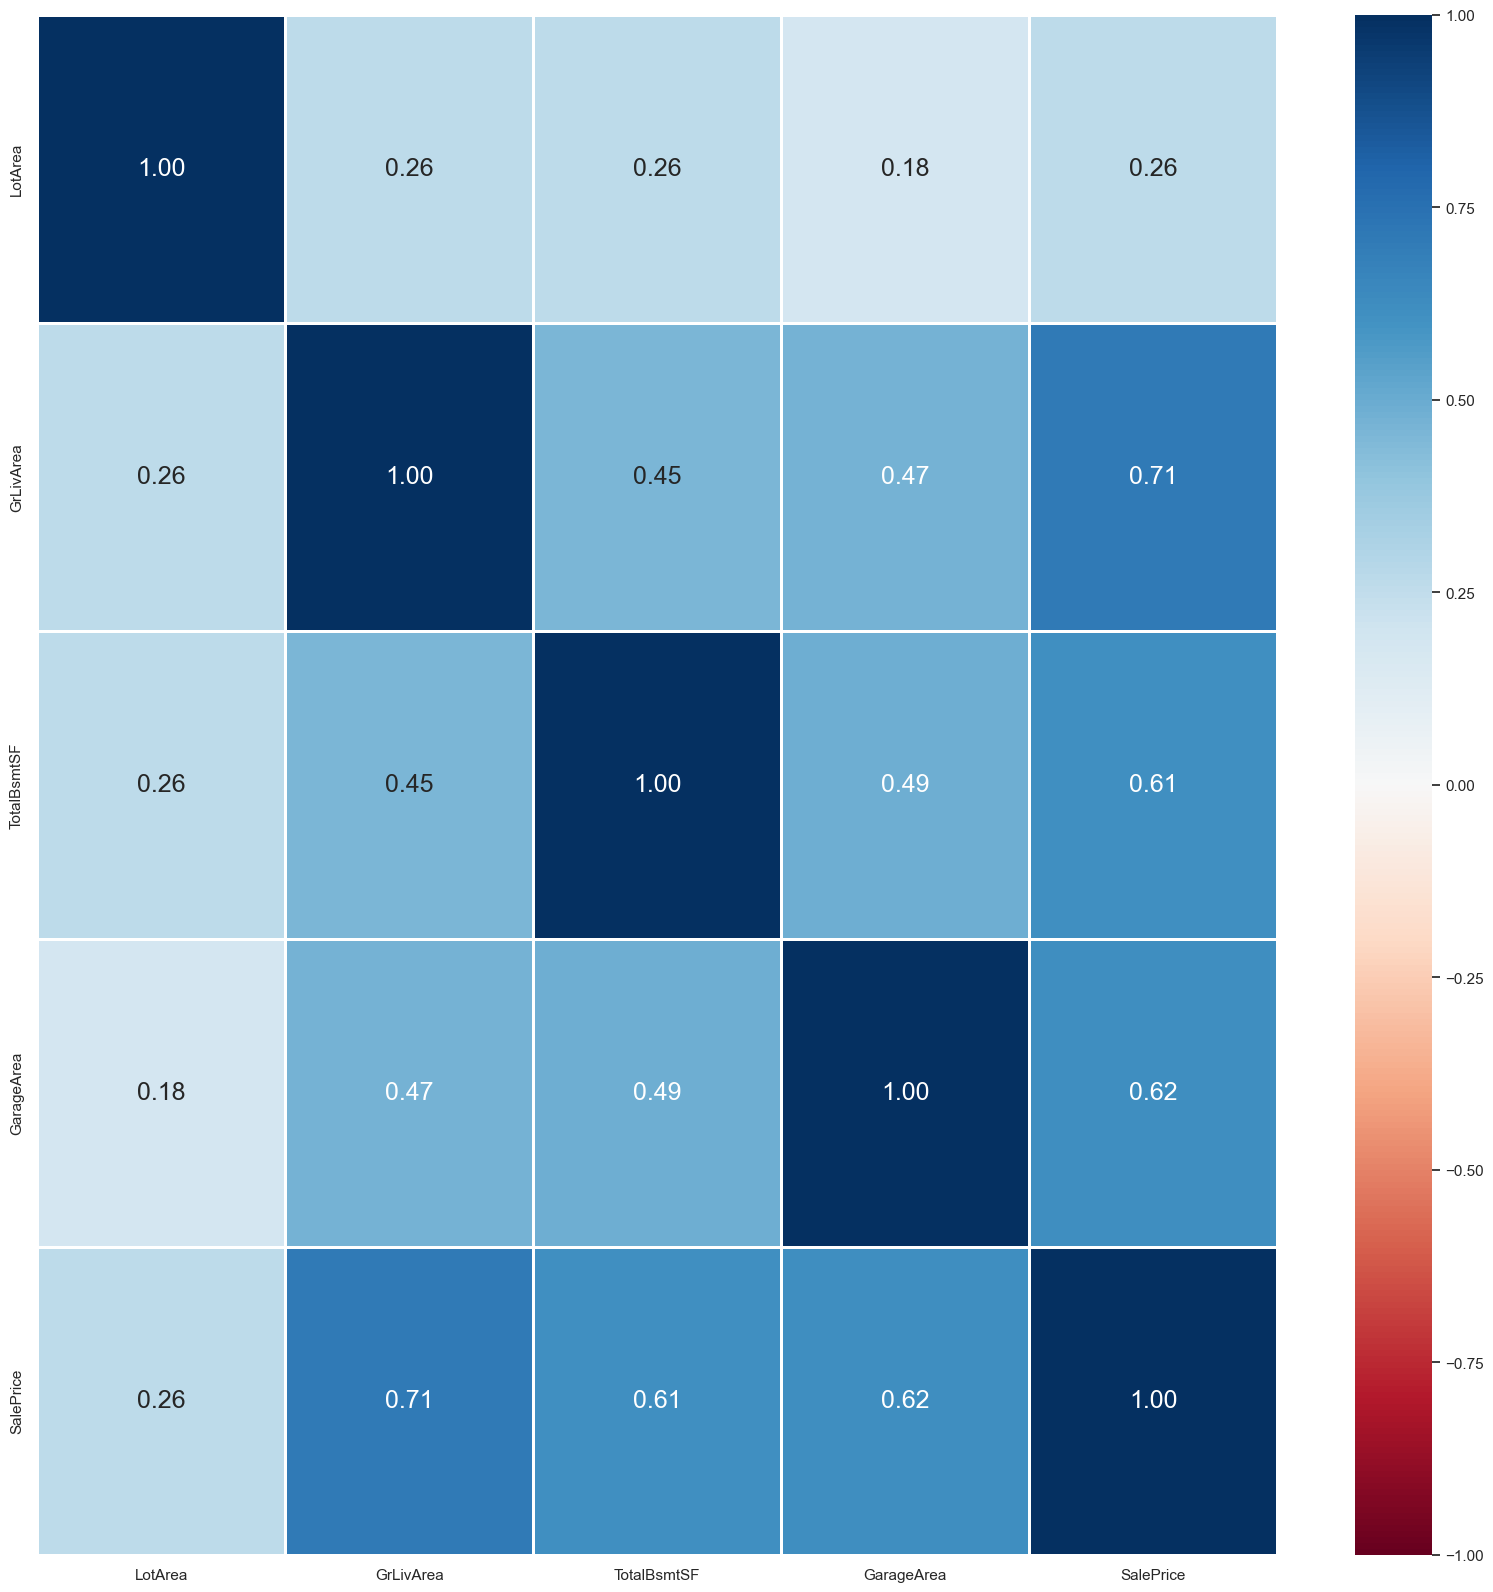

In [125]:
f = plt.figure(figsize=(20, 20))
sb.heatmap(newdata.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

plt.show()

## 1(c)Using the pairplot and heatmap we can tell that GrLivArea and GarageArea has the strongest relationship with SalePrice and thus they are the top 2 variables

# Problem 2

In [129]:
problemtwodata = pd.DataFrame(houseData[['MSSubClass', 'Neighborhood', 'BldgType', 'OverallQual']])
problemtwodata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSSubClass    1460 non-null   int64 
 1   Neighborhood  1460 non-null   object
 2   BldgType      1460 non-null   object
 3   OverallQual   1460 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 45.8+ KB


In [132]:
print("Number of Types for MSSubClass :", len(problemtwodata["MSSubClass"].unique()))
print("Number of Types for Neighborhood :", len(problemtwodata["Neighborhood"].unique()))
print("Number of Types for BldgType :", len(problemtwodata["BldgType"].unique()))
print("Number of Types for OverallQual :", len(problemtwodata["OverallQual"].unique()))


Number of Types for MSSubClass : 15
Number of Types for Neighborhood : 25
Number of Types for BldgType : 5
Number of Types for OverallQual : 10


## 2(a) Neighborhood has the highest number of levels of 25.

<AxesSubplot:xlabel='SalePrice', ylabel='MSSubClass'>

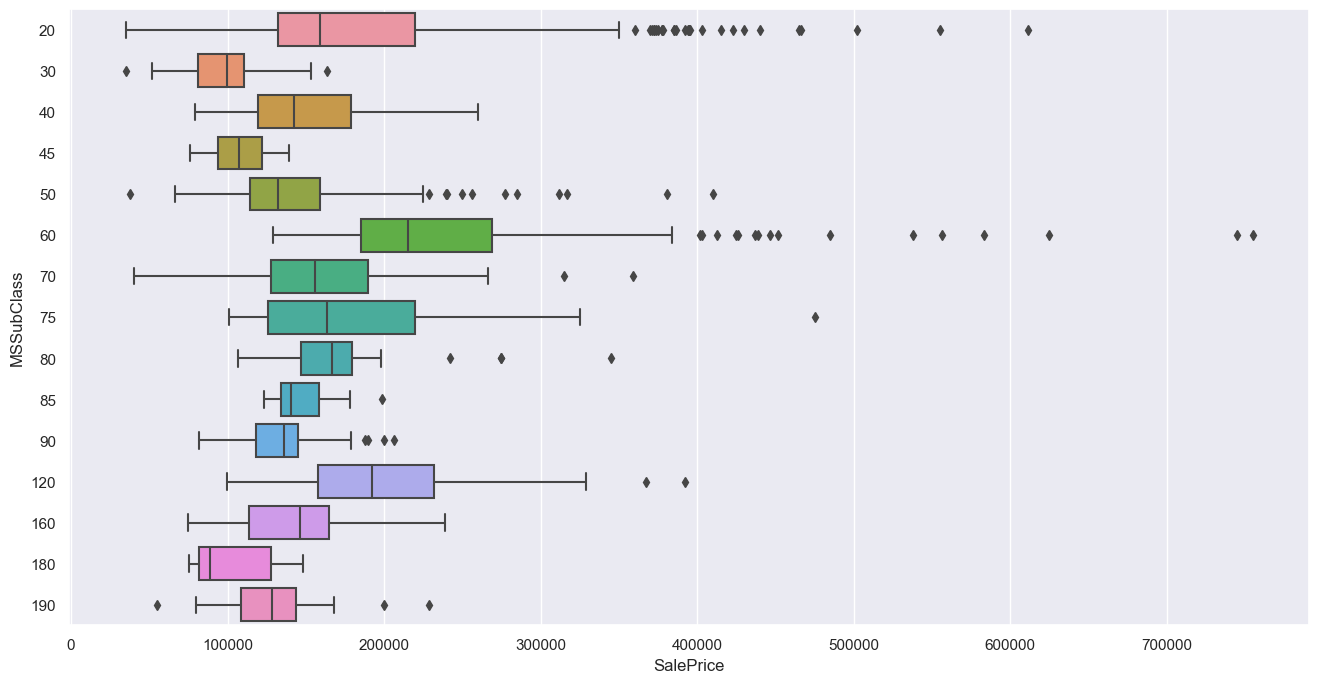

In [138]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(data = houseData, y = "MSSubClass", x = "SalePrice", orient = "h")

<AxesSubplot:xlabel='SalePrice', ylabel='Neighborhood'>

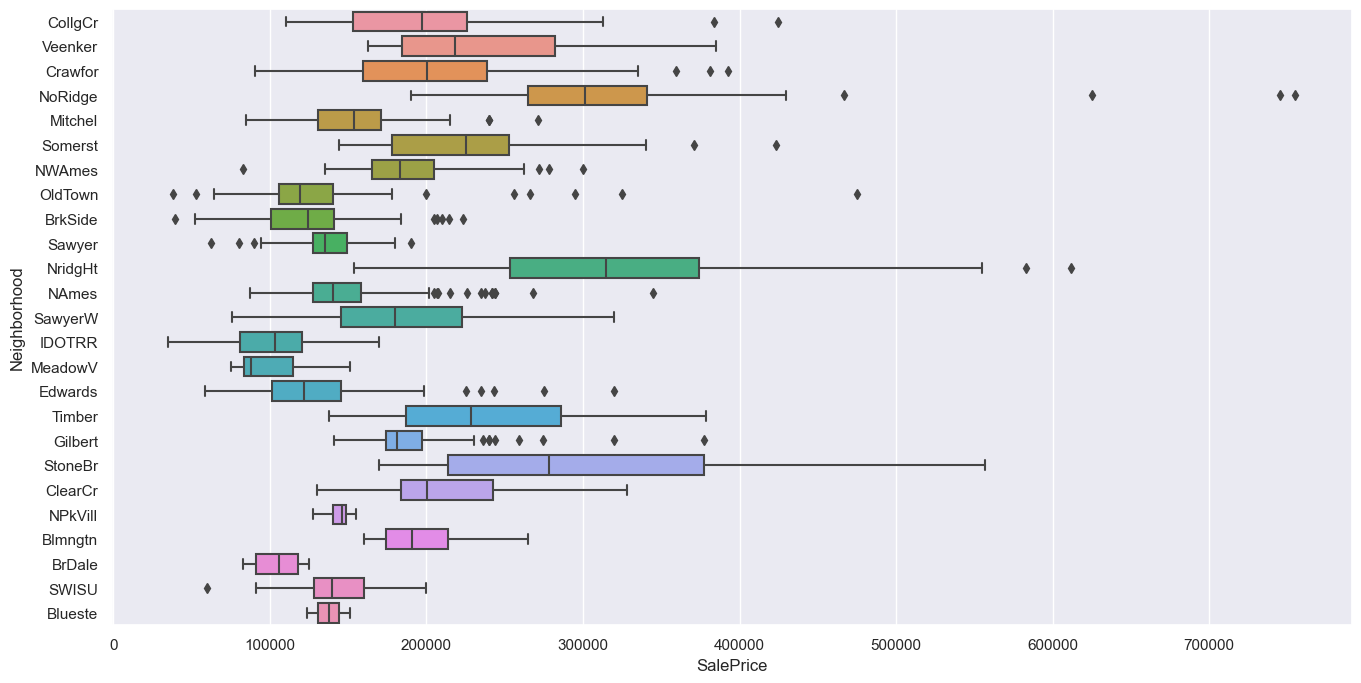

In [139]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(data = houseData, y = "Neighborhood", x = "SalePrice", orient = "h")

<AxesSubplot:xlabel='SalePrice', ylabel='BldgType'>

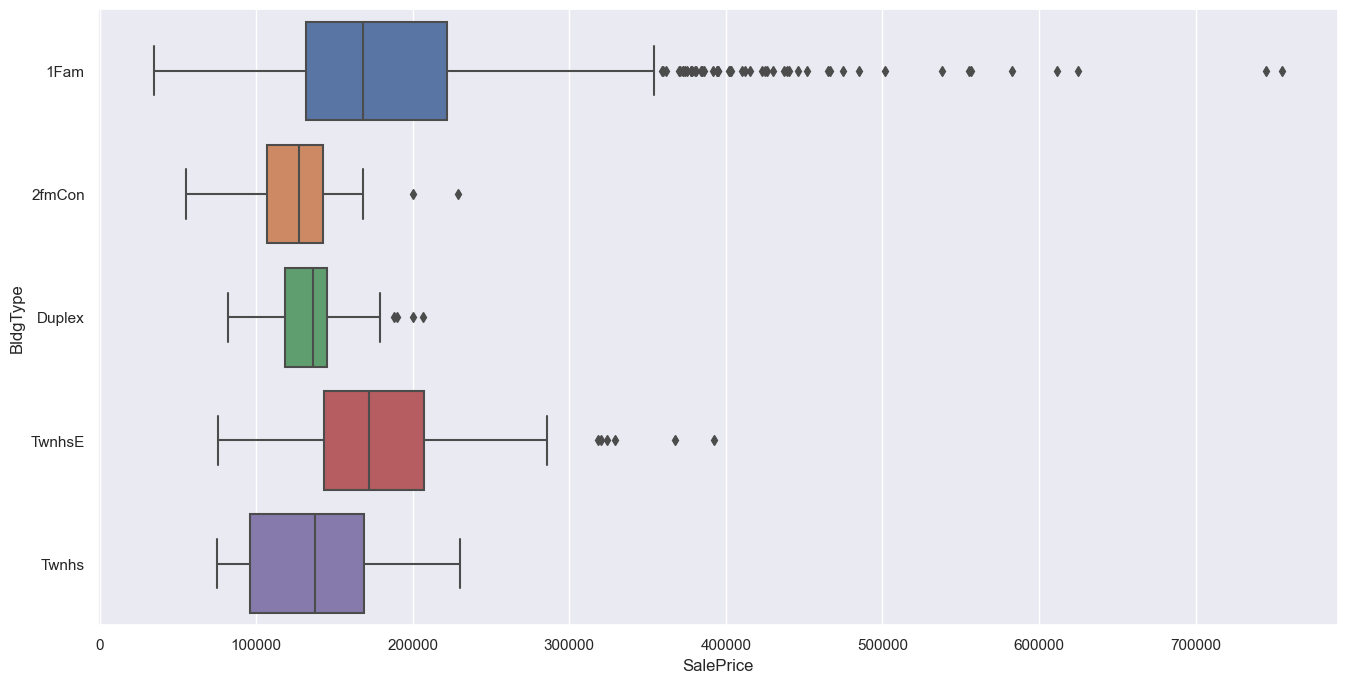

In [140]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(data = houseData, y = "BldgType", x = "SalePrice", orient = "h")

<AxesSubplot:xlabel='SalePrice', ylabel='OverallQual'>

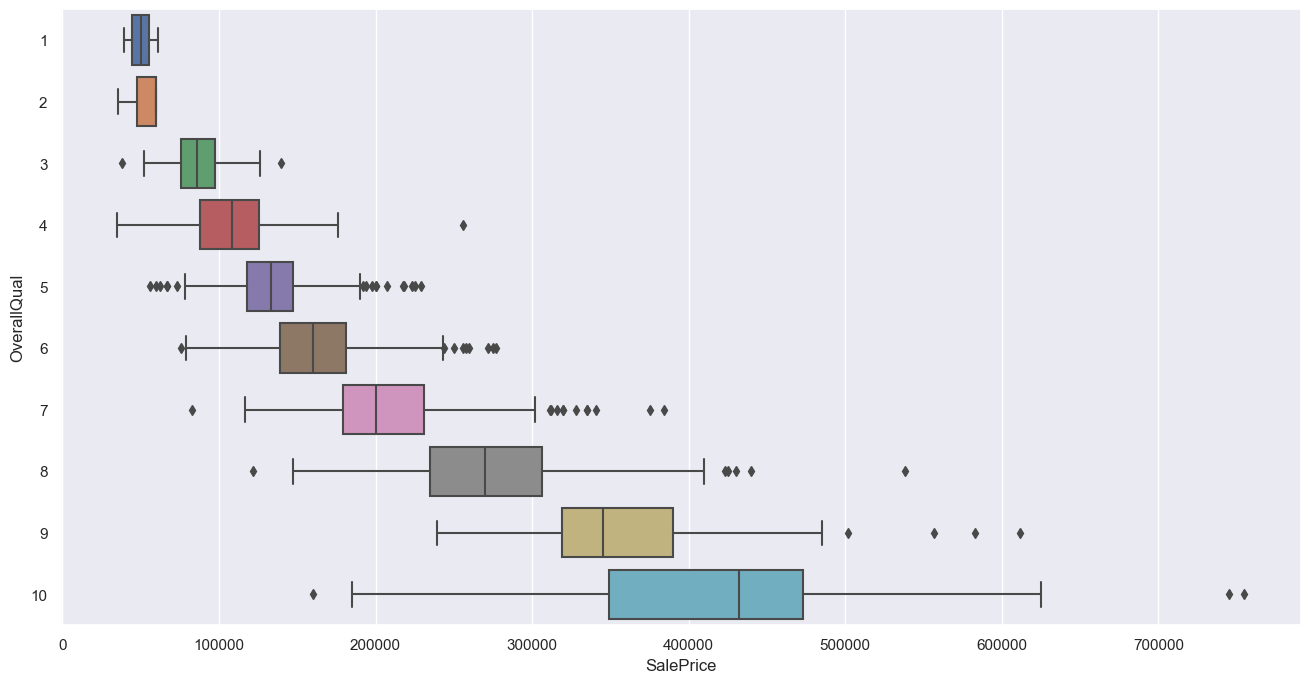

In [141]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(data = houseData, y = "OverallQual", x = "SalePrice", orient = "h")

## 2(a) Clearly, OverallQual and Neighborhood. As OverallQual increases, SalePrice generally increases. For different Neighborhood there is a varying range of prices as well.

# Problem 3

<AxesSubplot:xlabel='SalePrice', ylabel='GarageType'>

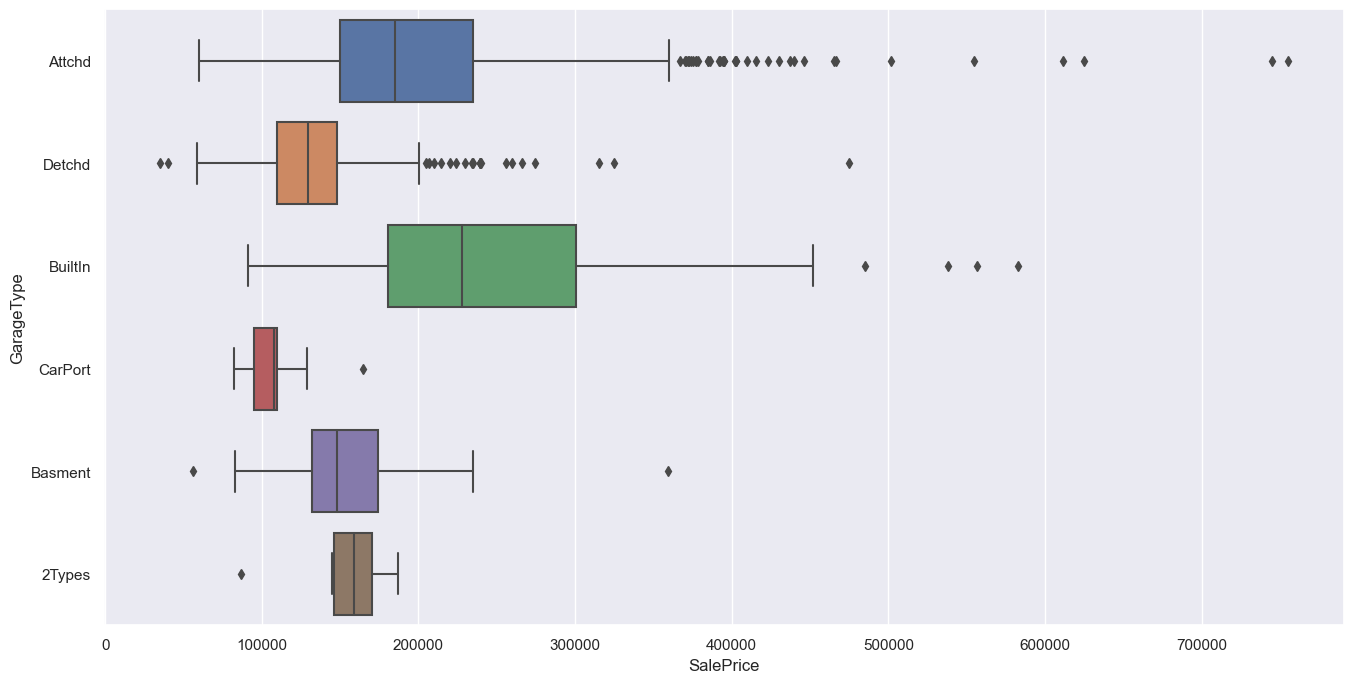

In [152]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(data = houseData, y = "GarageType", x = "SalePrice", orient = "h")

In [163]:
#Here I am replacing NA with False so it can be seen in the boxplot
df2 = houseData.copy()
df2 = df2.fillna(False)

<AxesSubplot:xlabel='SalePrice', ylabel='GarageType'>

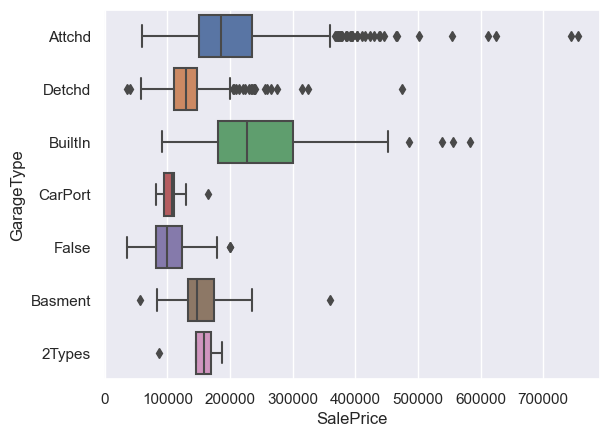

In [166]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(data = df2, y = "GarageType", x = "SalePrice", orient = "h")

## 3(a) The SalePrice generally does not get affected by whether it has a Garage or not. For houses with Detached garage, Carport garage, Basement garage, 2Types garage their SalePrice did not deviate much from houses with no garage